### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been  given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


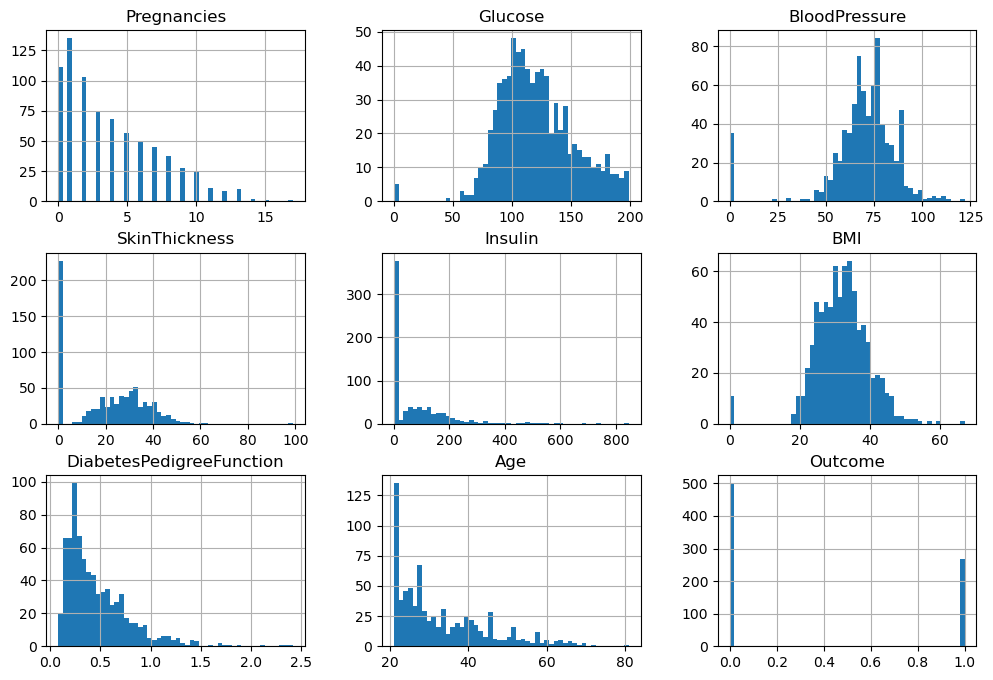

In [5]:
diabetes.hist(bins=50, figsize=(12,8))
plt.show()

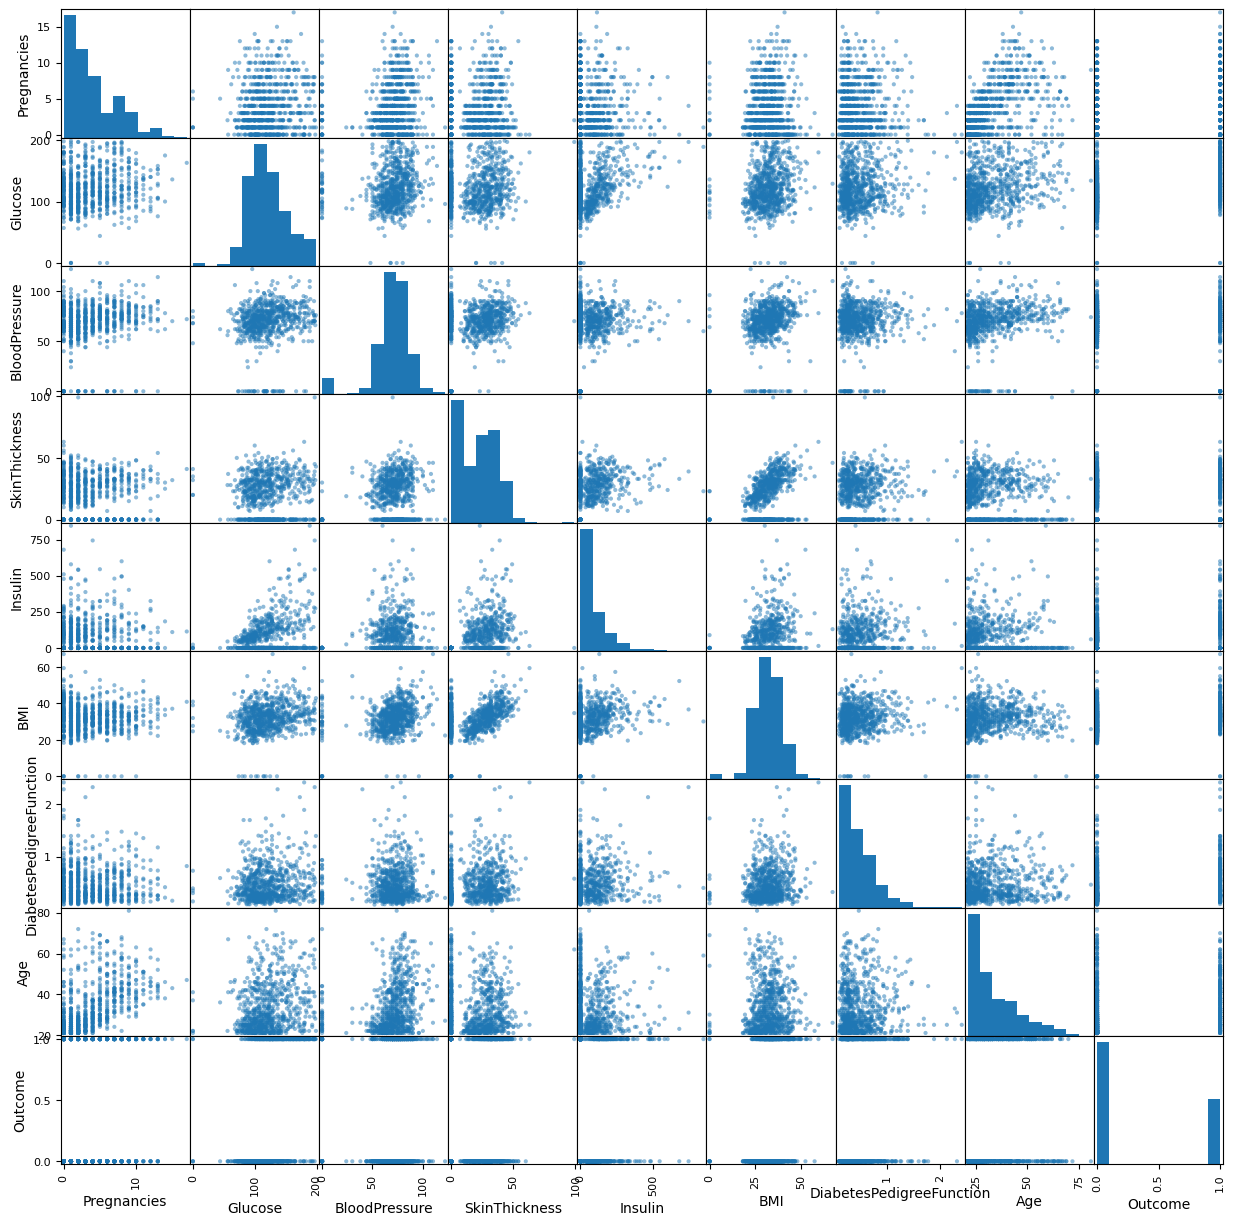

In [13]:
scatter_matrix(diabetes, figsize=(15,15))
plt.show()

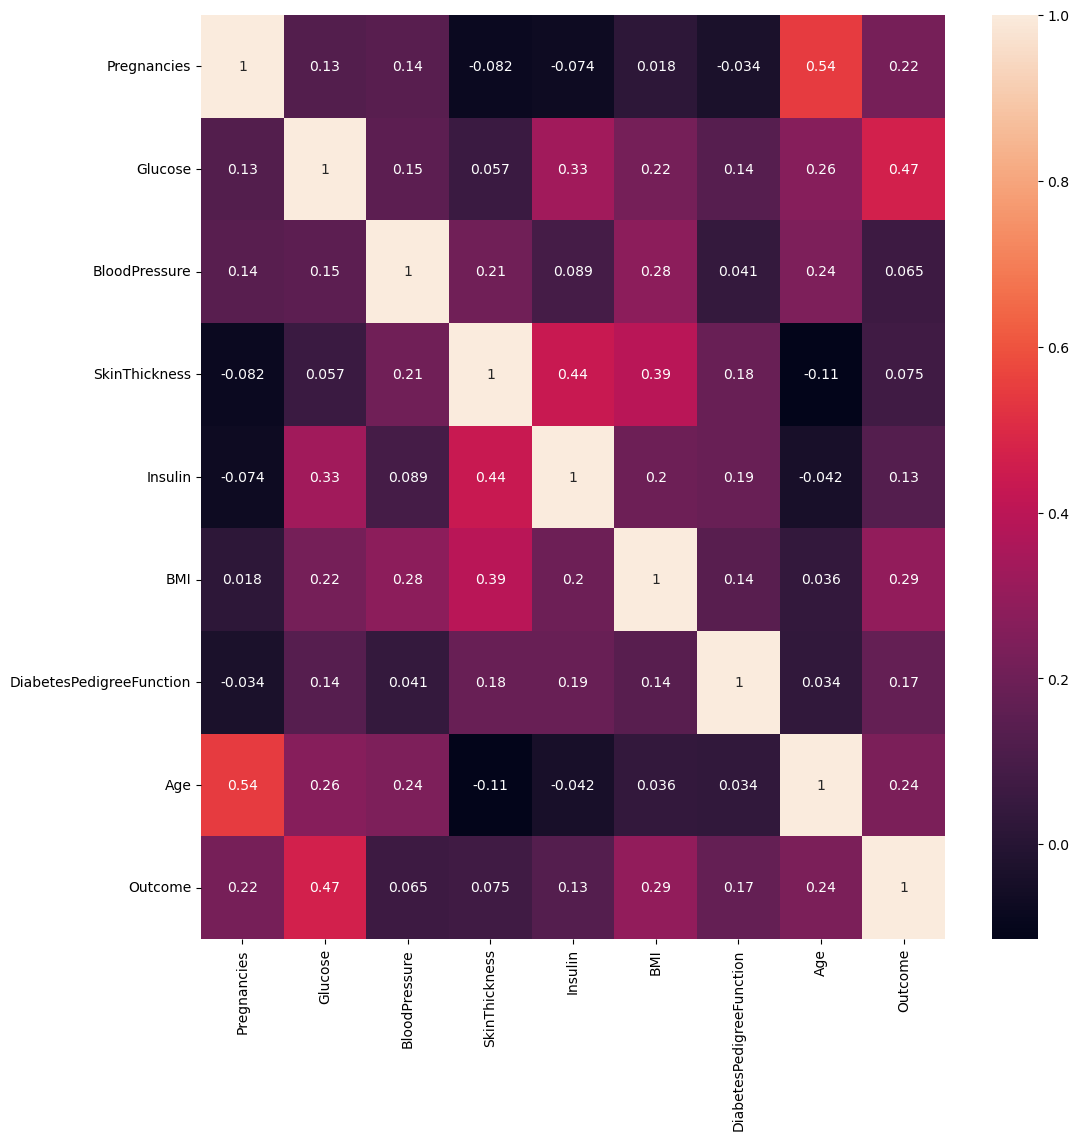

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(diabetes.corr(),annot=True)
plt.show()

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [22]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

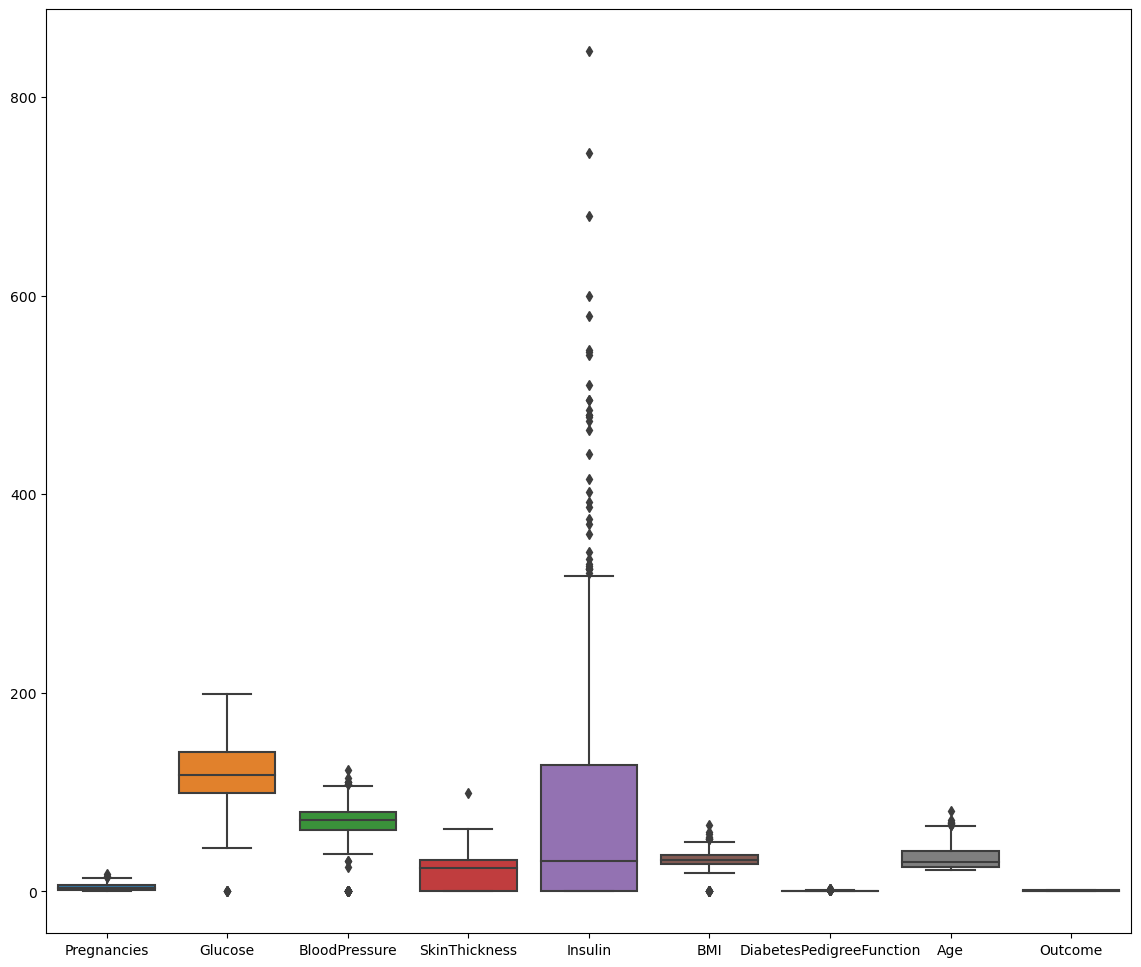

In [26]:
plt.figure(figsize=(14,12))
sns.boxplot(data=diabetes)

In [27]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No categrical columns so no need to hot encode or label encode

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [28]:
X = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']
X.shape, y.shape

((768, 8), (768,))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size=0.3,
                                                   random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((537, 8), (231, 8), (537,), (231,))

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
id3_tree = DecisionTreeClassifier(criterion='entropy')
id3_tree.fit(X_train, y_train)


c45_tree = DecisionTreeClassifier(criterion='gini')
c45_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [49]:
id3_score = id3_tree.score(X_test, y_test)
c45_score = c45_tree.score(X_test, y_test)

print("ID3 accuracy: {:.2f}".format(id3_score))
print("C4.5 accuracy: {:.2f}".format(c45_score))

ID3 accuracy: 0.77
C4.5 accuracy: 0.73


In [50]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

# Define the parameter grid to search over
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [2, 3, 4, 5, 6]}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))


tree_best = DecisionTreeClassifier(**grid_search.best_params_)
tree_best.fit(X_train, y_train)
test_score = tree_best.score(X_test, y_test)
print("Test set accuracy with best hyperparameters: {:.2f}".format(test_score))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}
Best score: 0.75
Test set accuracy with best hyperparameters: 0.74


### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [90]:
from sklearn.metrics import accuracy_score,precision_score,\
recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, RocCurveDisplay

In [64]:
y_pred = tree_best.predict(X_test)


In [65]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))


Accuracy: 0.74
Precision: 0.65
Recall: 0.66
F1 score: 0.66


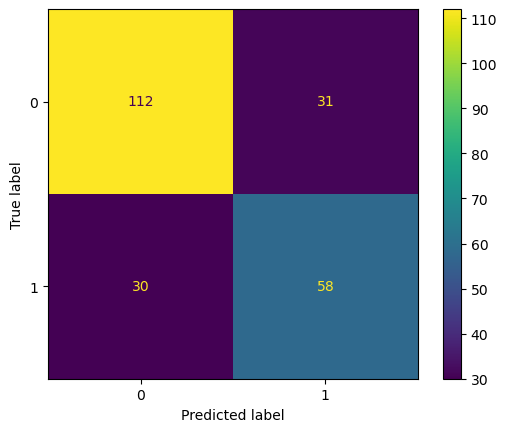

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=tree_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_best.classes_)
disp.plot()
plt.show()

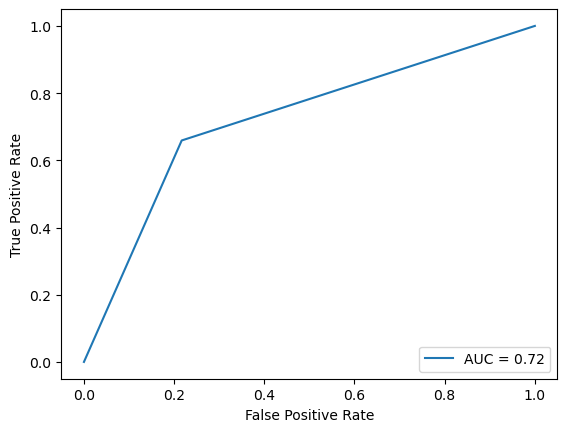

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
disp = RocCurveDisplay(fpr=fpr,
                      tpr=tpr,
                      roc_auc=roc_auc)
disp.plot()
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [94]:
from sklearn.tree import export_text

tree_rules = export_text(tree_best, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 154.50
|   |--- BMI <= 26.35
|   |   |--- Age <= 59.00
|   |   |   |--- DiabetesPedigreeFunction <= 0.68
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.68
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- Age >  59.00
|   |   |   |--- DiabetesPedigreeFunction <= 0.34
|   |   |   |   |--- class: 1
|   |   |   |--- DiabetesPedigreeFunction >  0.34
|   |   |   |   |--- class: 0
|   |--- BMI >  26.35
|   |   |--- Age <= 30.50
|   |   |   |--- Glucose <= 116.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.74
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.74
|   |   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  116.50
|   |   |   |   |--- BloodPressure <= 22.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BloodPressure >  22.00
|   |   |   |   |   |

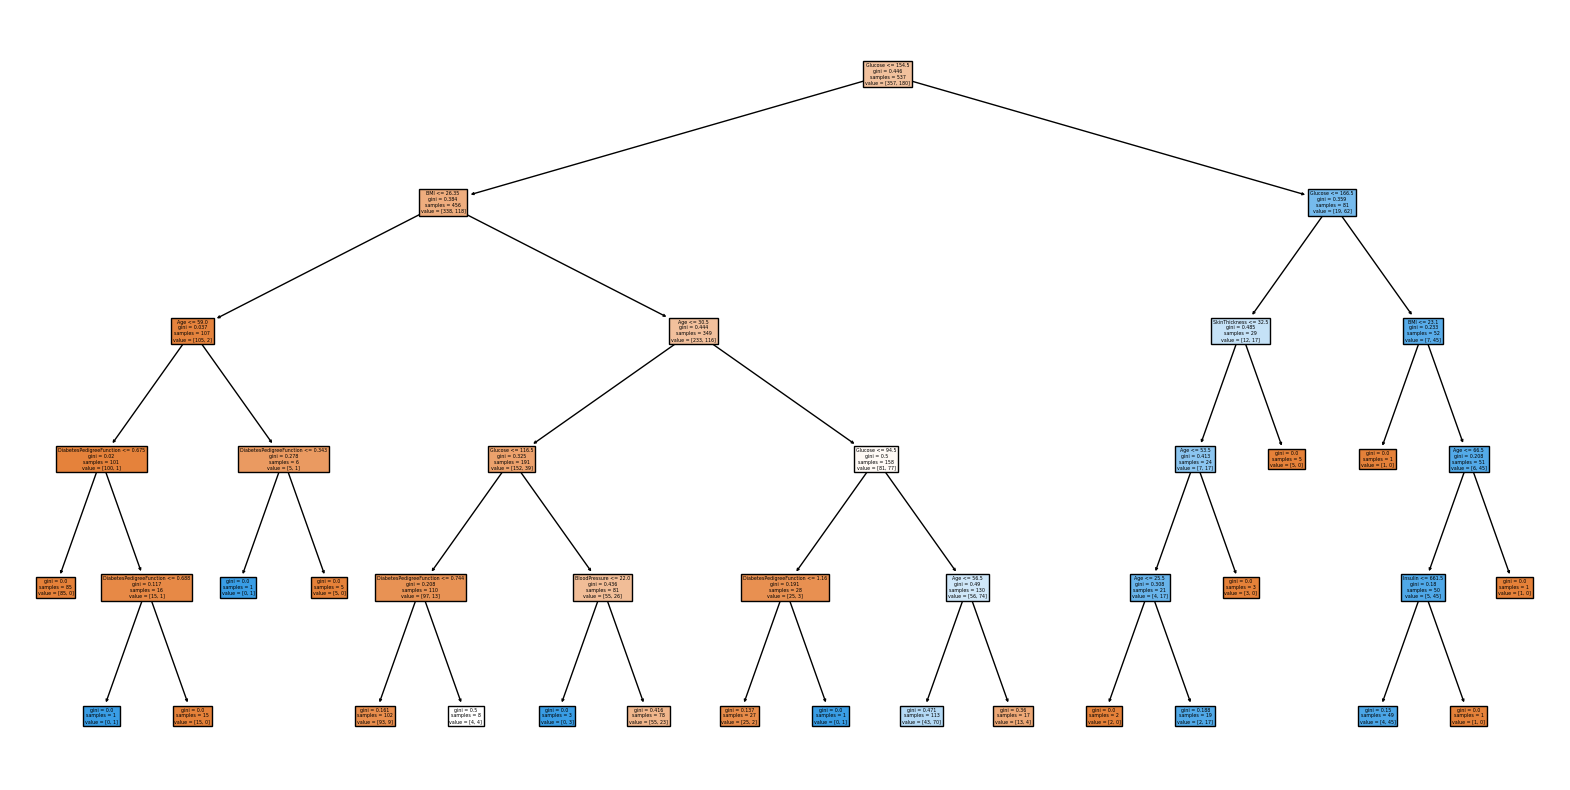

In [96]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_best, feature_names=list(X.columns), filled=True)
plt.show()

In [100]:
importance = tree_best.feature_importances_
feature_names = X_train.columns

for i,v in enumerate(importance):
    print('Feature %s: %s, Score: %.5f' % (i, feature_names[i], v))


Feature 0: Pregnancies, Score: 0.00000
Feature 1: Glucose, Score: 0.46142
Feature 2: BloodPressure, Score: 0.02554
Feature 3: SkinThickness, Score: 0.03692
Feature 4: Insulin, Score: 0.01470
Feature 5: BMI, Score: 0.15689
Feature 6: DiabetesPedigreeFunction, Score: 0.06950
Feature 7: Age, Score: 0.23503


As we can see `Glucose` is the most important feature according to the tree and then the `Age`,`BMI` and' `Insulin`

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [101]:
new_data = pd.DataFrame({
    'Pregnancies': [6, 1, 8, 1, 0],
    'Glucose': [148, 85, 183, 89, 137],
    'BloodPressure': [72, 66, 64, 66, 40],
    'SkinThickness': [35, 29, 0, 23, 35],
    'Insulin': [0, 0, 0, 94, 168],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
    'Age': [50, 31, 32, 21, 33],
    'Outcome': [1, 0, 1, 0, 1]
})

In [102]:
predictions = tree_best.predict(new_data.drop('Outcome', axis=1))

# Print the predictions
print(predictions)

[1 0 1 0 1]
